Installing Packages and Retrieving Dataset

In [ ]:
!kaggle datasets list
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list -s "resume"  # Search for resume datasets
!kaggle datasets download -d snehaanbhawal/resume-dataset
!unzip /content/resume-dataset.zip -d /content/
!ls /content/
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install nltk
import pandas as pd

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Mounted at /content/drive
cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()


Preprocessing Data

In [ ]:
df = pd.read_csv("/content/Resume/Resume.csv")
df.info(show_counts=True, memory_usage=True, verbose=True)
df.drop(columns=['Resume_html','ID'], inplace=True)
df['Resume_str'] = df['Resume_str'].str.lower()  # Convert text to lowercase
df['Resume_str'] = df['Resume_str'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
df.to_csv('/content/cleaned_resume_dataset.csv', index=False)
df.head()
# Count resumes per category
category_counts = df['Category'].value_counts()

# Display results
print(category_counts)

# Choose the column containing text (e.g., "Resume_str")
column_name = "Resume_str"

# Count total words in the column
total_words = df[column_name].astype(str).apply(lambda x: len(x.split())).sum()

print(f"Total number of words in '{column_name}' column: {total_words}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL           

Removing stopwords

In [ ]:
#Removes stopwords in Resume_str
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

nltk.download('stopwords')

# Tokenize and clean text
all_text = ' '.join(df['Resume_str']).lower()
all_text = re.sub(r'[^\w\s]', '', all_text)  # Remove punctuation
all_text = re.sub(r'\d+', '', all_text) # Remove all numbers

# Split text into words
word_list = all_text.split()

# Count word frequencies
word_freq = Counter(word_list)
common_words = word_freq.most_common(50)  # Top 50 words

print("Most frequent words before removing stopwords:", common_words)

nltk_stopwords = set(stopwords.words('english'))
dataset_stopwords = [word for word, count in common_words if word in nltk_stopwords]

print("Stopwords found in dataset:", dataset_stopwords)

# Remove stopwords from the word list
filtered_words = [word for word in word_list if word not in nltk_stopwords]

# Count word frequencies AFTER removing stopwords
word_freq_filtered = Counter(filtered_words)
common_words_filtered = word_freq_filtered.most_common(50)  # Top 50 words after removing stopwords

print("Most frequent words (excluding stopwords):", common_words_filtered)
df.to_csv('/content/cleaned_resume_dataset.csv', index=False)
cleaned_data = pd.read_csv('cleaned_resume_dataset.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most frequent words before removing stopwords: [('and', 123105), ('to', 54017), ('of', 43213), ('the', 36933), ('for', 28400), ('in', 27666), ('with', 21661), ('a', 16436), ('state', 16063), ('city', 15045), ('company', 14663), ('management', 11995), ('name', 11737), ('as', 10649), ('on', 10145), ('all', 8640), ('sales', 8124), ('skills', 7695), ('business', 7686), ('customer', 7607), ('by', 6763), ('new', 6336), ('service', 5994), ('team', 5871), ('development', 5648), ('experience', 5614), ('training', 5557), ('project', 5244), ('work', 4700), ('i', 4482), ('information', 4471), ('that', 4450), ('marketing', 4360), ('manager', 4309), ('financial', 4183), ('support', 4078), ('office', 4069), ('education', 4055), ('including', 4035), ('or', 4029), ('from', 4004), ('staff', 3901), ('professional', 3845), ('at', 3808), ('data', 3722), ('system', 3631), ('customers', 3513), ('systems', 3512), ('university', 3409), ('process', 3380)]
Stopwords found in dataset: ['and', 'to', 'of', 'the', '

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings

In [ ]:
#Split into train test sets
x = cleaned_data['Resume_str'].values
y = cleaned_data['Category'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((1863,), (621,))

In [ ]:
#TF-IDF Vectorization
tfidf_vector = TfidfVectorizer(sublinear_tf=True, max_features=13000, ngram_range=(1,5))
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)
x_train.shape, x_test.shape

((1863, 13000), (621, 13000))

In [ ]:
df['Category'] = df['Category'].str.lower().str.replace("-", " ").str.strip()
label_encoder = LabelEncoder()
label_encoder.fit(df['Category'])
print(label_encoder.classes_)  # Show all category labels

['accountant' 'advocate' 'agriculture' 'apparel' 'arts' 'automobile'
 'aviation' 'banking' 'bpo' 'business development' 'chef' 'construction'
 'consultant' 'designer' 'digital media' 'engineering' 'finance' 'fitness'
 'healthcare' 'hr' 'information technology' 'public relations' 'sales'
 'teacher']


Gradient Boosting Classifier (best performing model)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_diabetes
# Instantiate Gradient Boosting Classifier
gbc = GradientBoostingClassifier(loss='log_loss',
                                 n_estimators=50,
                                 random_state = 2,
                                 )

# Fit to training set
gbc.fit(x_train, y_train)

# Predict on training set
y_train_pred = gbc.predict(x_train)

# train set accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print accuracy
print('train accuracy: {:.2f}'.format(train_accuracy))

# Predict on test set
y_pred = gbc.predict(x_test)

# test set logloss
test_accuracy = accuracy_score(y_test, y_pred)

# Print logloss
print('test accuracy: {:.2f}'.format(test_accuracy))

precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

train accuracy: 1.00
test accuracy: 0.75
Precision: 0.747508692966143
Recall: 0.750402576489533
F1 Score: 0.7448294089102695


Analyzing Results

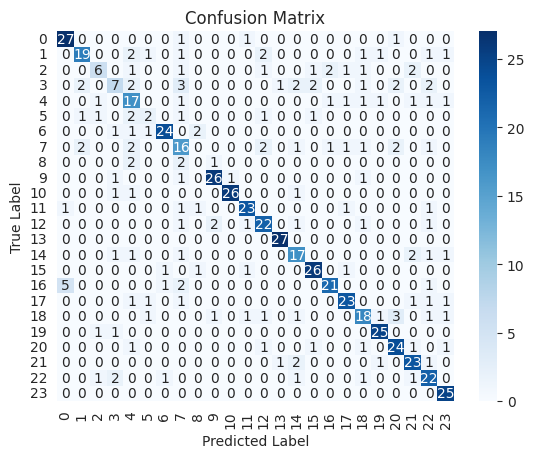

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import log_loss

y_pred_prob = gbc.predict_proba(x_test)
logloss = log_loss(y_test, y_pred_prob)
print("Log Loss:", logloss)

Log Loss: 0.9940716089308848


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.82      0.90      0.86        30
              ADVOCATE       0.79      0.66      0.72        29
           AGRICULTURE       0.60      0.38      0.46        16
               APPAREL       0.50      0.29      0.37        24
                  ARTS       0.52      0.65      0.58        26
            AUTOMOBILE       0.33      0.22      0.27         9
              AVIATION       0.89      0.83      0.86        29
               BANKING       0.48      0.55      0.52        29
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.87      0.87      0.87        30
                  CHEF       0.96      0.90      0.93        29
          CONSTRUCTION       0.85      0.82      0.84        28
            CONSULTANT       0.73      0.76      0.75        29
              DESIGNER       0.93      1.00      0.96        27
         DIGITAL-MEDIA       0.65      

Preprocessing Data for Prediction

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracting Text from PDF

In [ ]:
from pdfminer.high_level import extract_text
import os
from google.colab import files

# Upload file
uploaded = files.upload()

for filename in uploaded.keys():
    pdf_path = os.path.join('/content', filename)  # Creates the file path
    print(f"File: {filename} \nPath: {pdf_path}")  # Prints only the file path

    # Extract text from the PDF
    extracted_text = extract_text(pdf_path)

    # Print a sample of the extracted content (first 500 characters)
    print("\nExtracted Text Preview:\n")
    print(extracted_text[:500])  # Preview first 500 characters

    # If you need to preprocess before passing to the model
    processed_text = preprocess_text(extracted_text)
    print("\nProcessed Text:\n", processed_text[:500])

Saving CVResume - Nathanael Richard Ha Hanes 夏國龍.pdf to CVResume - Nathanael Richard Ha Hanes 夏國龍 (1).pdf
File: CVResume - Nathanael Richard Ha Hanes 夏國龍 (1).pdf 
Path: /content/CVResume - Nathanael Richard Ha Hanes 夏國龍 (1).pdf

Extracted Text Preview:

I’m  Nathanael  Richard  Ha  Hanes,  a  Biomechatronics  Engineering  student  at
National Taiwan University. I’m passionate about programming and engineering,
with  a  focus  on  robotics,  AI,  and  software  engineering.  I’ve  developed  strong
leadership, communication, and adaptability skills through club involvement and
work  experience. 
I’ve  also  gained  business  expertise  and  engineering
experience  as  a  Marketing  Specialist  at  WillStudy  and  as  a  Software
Engineering  Int

Processed Text:
 nathanael richard ha hanes biomechatronics engineering student national taiwan university passionate programming engineering focus robotics ai software engineering developed strong leadership communication adaptability skills c

In [ ]:
import pickle
import joblib

drive.mount('/content/drive')
joblib.dump(gbc, "/content/drive/My Drive/gradient_boosting_model.pkl")
gbc = joblib.load("/content/drive/My Drive/gradient_boosting_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Extract and preprocess text
raw_text = extract_text_from_pdf(pdf_path)
clean_text = preprocess_text(raw_text)

# Convert text into features
features = tfidf_vector.transform([clean_text])

# Predict the category
predicted_category = gbc.predict(features)[0]
print(f"Predicted CV Category: {predicted_category}")

Predicted CV Category: ENGINEERING


In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
SMOTE to make dataset more balanced across categories

In [ ]:
#Apply SMOTE to balance dataset categories that are <100
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define target sample size for each category
desired_samples = 100

# Find categories with less than 100 samples
underrepresented_categories = category_counts[category_counts < desired_samples].index.tolist()

# Define custom sampling strategy: only apply SMOTE to these categories
sampling_strategy = {category: desired_samples for category in underrepresented_categories}

print("Categories to be upsampled:", sampling_strategy)

# Apply SMOTE only to selected categories
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Check new category distribution
print("New category distribution after SMOTE:\n", Counter(y_resampled))

Categories to be upsampled: {'APPAREL': 100, 'DIGITAL-MEDIA': 100, 'AGRICULTURE': 100, 'AUTOMOBILE': 100, 'BPO': 100}
New category distribution after SMOTE:
 Counter({'BPO': 100, 'AGRICULTURE': 100, 'APPAREL': 100, 'DIGITAL-MEDIA': 100, 'AUTOMOBILE': 100, 'BUSINESS-DEVELOPMENT': 90, 'INFORMATION-TECHNOLOGY': 90, 'CHEF': 89, 'ADVOCATE': 89, 'ACCOUNTANT': 88, 'FINANCE': 88, 'AVIATION': 88, 'ENGINEERING': 88, 'FITNESS': 88, 'SALES': 87, 'CONSULTANT': 86, 'BANKING': 86, 'HEALTHCARE': 86, 'CONSTRUCTION': 84, 'PUBLIC-RELATIONS': 83, 'HR': 83, 'DESIGNER': 80, 'ARTS': 77, 'TEACHER': 77})


In [ ]:
Trying out different models to compare with GradientBoostingClassifier

In [ ]:
#1.Naive Bayes Model
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.76
Accuracy of  test set    : 0.55
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.52      0.97      0.67        30
              ADVOCATE       0.34      0.34      0.34        29
           AGRICULTURE       1.00      0.06      0.12        16
               APPAREL       1.00      0.04      0.08        24
                  ARTS       0.33      0.04      0.07        26
            AUTOMOBILE       0.00      0.00      0.00         9
              AVIATION       0.58      0.52      0.55        29
               BANKING       0.67      0.48      0.56        29
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.41      0.90      0.56        30
                  CHEF       0.76      0.76      0.76        29
          CONSTRUCTION       0.72      0.75      0.74        28
            CONSULTANT   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
#2. SVM model
from sklearn.svm import LinearSVC

svm_model = LinearSVC(C=1)
svm_model.fit(x_resampled, y_resampled)
y_pred_svm = svm_model.predict(x_test)
train_accuracy_svm = svm_model.score(x_resampled, y_resampled)

print("SVM Training Accuracy:", train_accuracy_svm)
print("SVM Accuracy on Test Set:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Training Accuracy: 0.999529854254819
SVM Accuracy on Test Set: 0.6698872785829307

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.67      1.00      0.80        30
              ADVOCATE       0.61      0.48      0.54        29
           AGRICULTURE       0.60      0.38      0.46        16
               APPAREL       0.57      0.33      0.42        24
                  ARTS       0.67      0.23      0.34        26
            AUTOMOBILE       0.43      0.33      0.38         9
              AVIATION       0.75      0.83      0.79        29
               BANKING       0.68      0.66      0.67        29
                   BPO       1.00      0.40      0.57         5
  BUSINESS-DEVELOPMENT       0.68      0.87      0.76        30
                  CHEF       0.89      0.83      0.86        29
          CONSTRUCTION       0.72      0.82      0.77        28
            CONSULTANT       0.56      0.31      0.40   

In [ ]:
#3. Logistic Regression
# Standardize features
from sklearn.preprocessing import StandardScaler

# Train Logistic Regression model on TF-IDF transformed data
logistic_model = LogisticRegression(max_iter=500)  # Increase iterations for convergence
logistic_model.fit(x_resampled, y_resampled)

# Make predictions
y_pred_logistic = logistic_model.predict(x_test)

# Evaluate performance
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_logistic * 100))

# Show classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 61.67%

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.60      0.97      0.74        30
              ADVOCATE       0.46      0.45      0.46        29
           AGRICULTURE       0.54      0.44      0.48        16
               APPAREL       0.40      0.33      0.36        24
                  ARTS       0.71      0.19      0.30        26
            AUTOMOBILE       0.20      0.22      0.21         9
              AVIATION       0.69      0.69      0.69        29
               BANKING       0.63      0.59      0.61        29
                   BPO       0.33      0.20      0.25         5
  BUSINESS-DEVELOPMENT       0.54      0.83      0.66        30
                  CHEF       0.92      0.76      0.83        29
          CONSTRUCTION       0.79      0.79      0.79        28
            CONSULTANT       0.38      0.17      0.24        29
              DESIGNER       0.87      0.

In [ ]:
#4. Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the model with 200 trees
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_model.fit(x_resampled, y_resampled)

y_pred = rf_model.predict(x_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")  # Print accuracy with 2 decimal places

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.72
                        precision    recall  f1-score   support

            ACCOUNTANT       0.68      1.00      0.81        30
              ADVOCATE       0.78      0.62      0.69        29
           AGRICULTURE       0.75      0.38      0.50        16
               APPAREL       0.50      0.29      0.37        24
                  ARTS       0.60      0.12      0.19        26
            AUTOMOBILE       0.60      0.33      0.43         9
              AVIATION       0.82      0.93      0.87        29
               BANKING       0.74      0.59      0.65        29
                   BPO       1.00      0.20      0.33         5
  BUSINESS-DEVELOPMENT       0.72      0.87      0.79        30
                  CHEF       0.83      0.86      0.85        29
          CONSTRUCTION       0.85      0.82      0.84        28
            CONSULTANT       0.60      0.41      0.49        29
              DESIGNER       0.93      0.96      0.95        27
         DIGITAL-MEDIA  

In [ ]:
# Encode labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Category'])  # Convert to numbers
print(y)

[19 19 19 ...  6  6  6]


In [ ]:
#5 .Fasttext Model
!pip install fasttext
import fasttext

# Load CSV file
df = pd.read_csv("/content/Resume/Resume.csv")
df_cleaned = df.dropna()

# Choose the column names
text_column = "Resume_str"   # Column with text
label_column = "Category"    # Column with categories

# Convert categories to FastText format (e.g., "__label__DataScientist")
df[label_column] = df[label_column].apply(lambda x: f"__label__{x}")

# Save as a text file
train_file = "train_fasttext.txt"
df[[label_column, text_column]].to_csv(train_file, sep=" ", index=False, header=False, quoting=3, escapechar="\\")

print(f"Data saved in FastText format: {train_file}")

# Train the model
model = fasttext.train_supervised(input=train_file, epoch=50, lr=1.0, wordNgrams=2)

# Save the trained model
model.save_model("fasttext_model.bin")

print("FastText model trained and saved!")

# Load the trained model
model = fasttext.load_model("fasttext_model.bin")

# Predict category for a new resume
text = "build bridges."
predictions = model.predict(text)  # Returns label and confidence score

print(f"Predicted Category: {predictions[0][0].replace('__label__', '')}")  # Remove label prefix
print(f"Confidence Score: {predictions[1][0]:.2f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313474 sha256=e11fb9f93ce4c7477806d56f9961f6247589ed2b077966fbd8e54944dadb9601
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext
Data saved in FastText format: train_fasttext.txt
FastText model trained and saved!
Predicted Category: ARTS
Confidence Score: 0.45


GBC is still the best model

In [ ]:
###############################################################################

In [ ]:
#upload the CV to colab
from google.colab import files
uploaded = files.upload()

import os

# Get the uploaded filename
pdf_filename = list(uploaded.keys())[0]

# Set the path to the uploaded PDF
pdf_path = os.path.join("/content", pdf_filename)

print("PDF saved at:", pdf_path)

In [ ]:
import re
#extracting text from CV
text = extract_text(pdf_path).lower()

# Then split and join
clean_text = re.sub(r"\s+", " ", text).strip()

print(clean_text)
txt_file = open("txt_file.txt", "w")
f = open("txt_file.txt", "a")
f.write(clean_text.strip())  # Already lowercase, no need for .lower() again
f.close()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer